In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.io as scio

In [2]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [3]:
def linear_reg_cost_function(theta, X, y, lmd):
    # Initialize some useful values
    m = y.size

    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost and gradient of regularized linear
    #                regression for a particular choice of theta
    #
    #                You should set 'cost' to the cost and 'grad'
    #                to the gradient
    #
    
    h = np.dot(X, theta)
    error = h - y
    J = np.sum(error ** 2) / (2 * m) + np.sum(theta[1:] ** 2) * lmd / (2 * m)
    reg_term = theta * lmd / m
    reg_term[0] = 0
    grad = np.dot(X.T, error) / m + reg_term

    # ==========================================================

    return J, grad

In [4]:
def train_linear_reg(X, y, lmd):
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    def cost_func(t):
        return linear_reg_cost_function(t, X, y, lmd)[0]

    def grad_func(t):
        return linear_reg_cost_function(t, X, y, lmd)[1]

    theta, *unused = opt.fmin_cg(cost_func, fprime=grad_func, x0=initial_theta, maxiter=200, disp=False, full_output=True)

    return theta

In [5]:
def poly_feature(X, p):
    # You need to return the following variables correctly.
    X_poly = np.zeros((X.size, p))

    # ===================== Your Code Here =====================
    # Instructions : Given a vector X, return a matrix X_poly where the p-th
    #                column of X contains the values of X to the p-th power.
    #

    p_series = np.arange(1, p + 1)
    X_poly = X.reshape((X.size, 1)) ** p

    # ==========================================================

    return X_poly

In [6]:
def plot_fit(min_X, max_X, mu, sigma, theta, p):
    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    X = np.arange(min_X - 15, max_X + 25, 0.05)

    # Map the X values
    X_poly = poly_feature(X, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.c_[np.ones(X.size), X_poly]

    # Plot
    plt.plot(X, np.dot(X_poly, theta))

In [7]:
def learning_curve(X, y, Xval, yval, lmd):
    # Number of training examples
    m = X.shape[0]

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    # ===================== Your Code Here =====================
    # Instructions : Fill in this function to return training errors in
    #                error_train and the cross validation errors in error_val.
    #                i.e., error_train[i] and error_val[i] should give you
    #                the errors obtained after training on i examples
    #
    # Note : You should evaluate the training error on the first i training
    #        examples (i.e. X[:i] and y[:i])
    #
    #        For the cross-validation error, you should instead evaluate on
    #        the _entire_ cross validation set (Xval and yval).
    #
    # Note : If you're using your cost function (linear_reg_cost_function)
    #        to compute the training and cross validation error, you should
    #        call the function with the lamdba argument set to 0.
    #        Do note that you will still need to use lamdba when running the
    #        training to obtain the theta parameters.
    #

    def cost_func(theta, X, y):
        return linear_reg_cost_function(theta, X, y, 0)[0]

    for i in range(m):
        X_i, y_i = X[:i + 1], y[:i + 1]
        theta = train_linear_reg(X, y, lmd)

        error_train[i] = cost_func(theta, X_i, y_i)
        error_val[i] = cost_func(theta, Xval, yval)

    # ==========================================================

    return error_train, error_val

In [8]:
def validation_curve(X, y, Xval, yval):
    # Selected values of lambda (you should not change this)
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros(lambda_vec.size)
    error_val = np.zeros(lambda_vec.size)

    # ===================== Your Code Here =====================
    # Instructions : Fill in this function to return training errors in
    #                error_train and the validation errors in error_val. The
    #                vector lambda_vec contains the different lambda parameters
    #                to use for each calculation of the errors, i.e,
    #                error_train[i], and error_val[i] should give
    #                you the errors obtained after training with
    #                lmd = lambda_vec[i]
    #

    def cost_func(theta, X, y):
        return linear_reg_cost_function(theta, X, y, 0)[0]

    for i in range(lambda_vec.size):
        theta = train_linear_reg(X, y, lambda_vec[i])

        error_train[i] = cost_func(theta, X, y)
        error_val[i] = cost_func(theta, Xval, yval)


    # ==========================================================

    return lambda_vec, error_train, error_val

## Part 1: Loading and Visualizing Data

In [9]:
# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data = scio.loadmat('/content/drive/MyDrive/Coursera_ML/Exer_5/ex5data1.mat')
X, y = data['X'], data['y'].flatten()
Xval, yval = data['Xval'], data['yval'].flatten()
Xtest, ytest = data['Xtest'], data['ytest'].flatten()

In [10]:
# m = Number of examples
m = y.size

Text(0, 0.5, 'Water folowing out of the dam (y)')

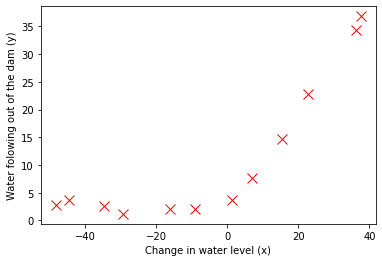

In [11]:
# Plot training data
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')

## Part 2: Regularized Linear Regression Cost

In [12]:
theta = np.array([1, 1])
J, grad = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

In [13]:
print('Cost at theta = [1  1]: {:0.6f}\n(this value should be about 303.993192'.format(J))

Cost at theta = [1  1]: 303.993192
(this value should be about 303.993192


## Part 3: Regularized Linear Regression Gradient

In [14]:
theta = np.array([1, 1])
J, grad = linear_reg_cost_function(theta, np.c_[np.ones(m), X], y, 1)

In [15]:
print('Gradient at theta = [1  1]: {}\n(this value should be about [-15.303016  598.250744]'.format(grad))

Gradient at theta = [1  1]: [-15.30301567 598.25074417]
(this value should be about [-15.303016  598.250744]


## Part 4: Train Linear Regression

In [16]:
# Train linear regression with lambda = 0
lmd = 0
theta = train_linear_reg(np.c_[np.ones(m), X], y, lmd)

Text(0, 0.5, 'Water folowing out of the dam (y)')

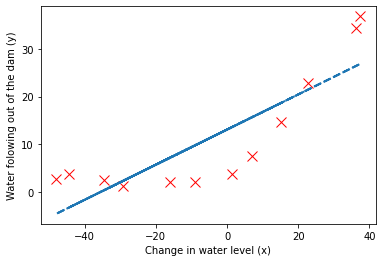

In [17]:
# Plot fit over the data
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.plot(X, np.dot(np.c_[np.ones(m), X], theta), '--', linewidth=2)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')

# Part 5: Learning Curve for Linear Regression

In [18]:
lmd = 0
error_train, error_val = learning_curve(np.c_[np.ones(m), X], y, np.c_[np.ones(Xval.shape[0]), Xval], yval, lmd)

(0.0, 13.0, 0.0, 150.0)

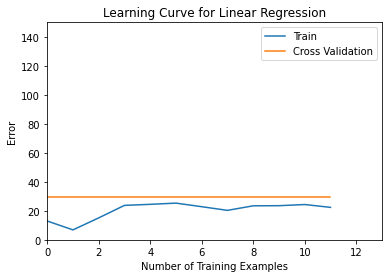

In [19]:
plt.plot(np.arange(m), error_train)
plt.plot(np.arange(m), error_val)
plt.title('Learning Curve for Linear Regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

## Part 6 : Feature Mapping for Polynomial Regression

In [20]:
# One solution to this is to use polynomial regression. You should now
# complete polyFeatures to map each example into its powers
p = 8

In [21]:
# Map X onto Polynomial Features and Normalize
X_poly = poly_feature(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.c_[np.ones(m), X_poly]

In [22]:
# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = poly_feature(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.c_[np.ones(X_poly_test.shape[0]), X_poly_test]

In [23]:
# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = poly_feature(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.c_[np.ones(X_poly_val.shape[0]), X_poly_val]

In [24]:
print('Normalized Training Example 1 : \n{}'.format(X_poly[0]))

Normalized Training Example 1 : 
[ 1.         -0.50848117]


## Part 7: Learning Curve for Polynomial Regression

In [25]:
lmd = 0
theta = train_linear_reg(X_poly, y, lmd)

(0.0, 60.0)

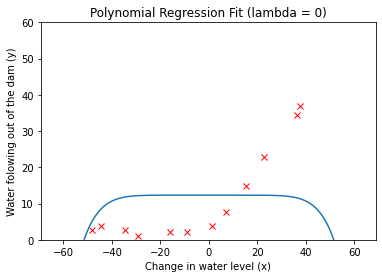

In [26]:
# Plot training data and fit
plt.plot(X, y, 'rx')
plot_fit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water folowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = {})'.format(lmd))
plt.ylim([0, 60])

In [27]:
error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lmd)

(0.0, 13.0, 0.0, 150.0)

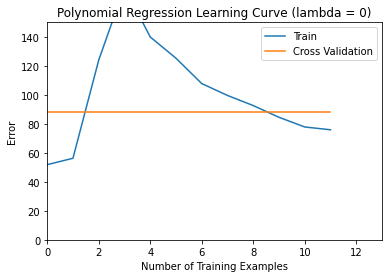

In [28]:
plt.plot(np.arange(m), error_train, np.arange(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(lmd))
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

In [29]:
print('Polynomial Regression (lambda = {})'.format(lmd))
print('# Training Examples\tTrain Error\t\tCross Validation Error')
for i in range(m):
    print('  \t{}\t\t{}\t{}'.format(i, error_train[i], error_val[i]))

Polynomial Regression (lambda = 0)
# Training Examples	Train Error		Cross Validation Error
  	0		51.83229465353839	88.23179082679229
  	1		56.243022316077514	88.23179082679229
  	2		123.93455920155311	88.23179082679229
  	3		174.1783124109906	88.23179082679229
  	4		139.9350728483011	88.23179082679229
  	5		125.27549547529141	88.23179082679229
  	6		107.78840160417725	88.23179082679229
  	7		99.58124770364132	88.23179082679229
  	8		92.6033707878911	88.23179082679229
  	9		84.51518000067396	88.23179082679229
  	10		77.83149138953276	88.23179082679229
  	11		75.89861667141938	88.23179082679229


## Part 8: Validation for Selecting Lambda

In [30]:
lambda_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

Text(0, 0.5, 'Error')

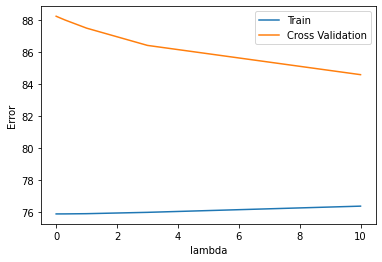

In [31]:
plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

In [32]:
print('lambda\t\tTrain Error\tValidation Error')
for i in range(lambda_vec.size):
    print('{:.4f}\t{:.6f}\t{:.6f}'.format(lambda_vec[i], error_train[i], error_val[i]))

lambda		Train Error	Validation Error
0.0000	75.898617	88.231791
0.0010	75.898617	88.230957
0.0030	75.898617	88.229289
0.0100	75.898618	88.223460
0.0300	75.898633	88.206858
0.1000	75.898790	88.149386
0.3000	75.900124	87.990427
1.0000	75.913466	87.489252
3.0000	75.996806	86.412082
10.0000	76.383503	84.586760
